# Demonstration of a simple Bernoulli bandits

In [1]:
import fortuna
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Initilising three Bernoulli bandits with different probabilities

In [2]:
probabilities = [0.4,0.6,0.7]
colors = ['blue','red','green']
bandits = [fortuna.bandits.Bernoulli(p) for p in probabilities]

### We can plot the probabilities of the three bandits

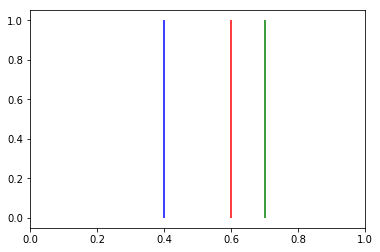

In [3]:
for bandit,col in zip(bandits,colors):
    bandit.plot_prior(color=col)
plt.show()

### We are initilizing all three bandits with uninformed priors, i.e. all likelihoods between 0 and 1 are equally likely.
#### A different prior can be assigned using bandit.assign_prior(a, b) for cases where you might know more about the probability

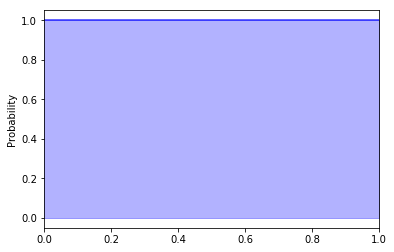

In [4]:
bandits[0].plot_posterior(color=colors[0])
plt.show()

### Now we are going to sample from the bandits, and select one to sample
#### Where they all have the same posteriors this is random sampling (exploring the bandits)

In [5]:
samples = [bandit.sample() for bandit in bandits]
print(f'The samples are: {samples}')
print(f'selecting one to sample based on the maximal reward')
chosen_bandit_index = fortuna.choice.e_greedy(samples)
chosen_bandit = bandits[chosen_bandit_index]
print(f'Chosen bandit number {chosen_bandit_index}.')

The samples are: [0.8346584989790687, 0.021148500138817628, 0.7133124465204519]
selecting one to sample based on the maximal reward
Chosen bandit number 0.


### As a bandit has been chosen, we now 'pull' the bandit and update the bandit according to the result

In [6]:
reward = chosen_bandit.pull()
print(f'The result of the pull was {reward}')
chosen_bandit.update(reward)

The result of the pull was True


### We can see that the posterior function has been updated for this bandit

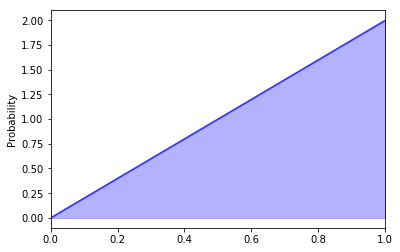

In [7]:
chosen_bandit.plot_posterior()

### The above can be done many times

#### We are using the epsilon-greedy algorithm to select the bandit, where epsilon is set to 0.9. This means that 90% of the time, the bandit with the highest sample will be chosen, and the other 10% the bandit is chosen at random

In [8]:
n_steps = 200
chosen = []

for i in range(0,n_steps-1):# we have already done one step
    samples = [bandit.sample() for bandit in bandits]
    index = fortuna.choice.e_greedy(samples,e=0.9)
    chosen_bandit = bandits[index]
    chosen.append(np.argmax(samples))
    reward = chosen_bandit.pull()
    chosen_bandit.update(reward)

### Look at the posterior functions after some steps, and compare to their underlying probabilities
#### As the posterior becomes closer to the underlying probability, when we perform argmax() we will increasingly select the bandit that returns the maximum reward (the green one)

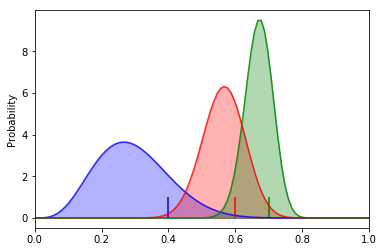

In [9]:
for bandit,col in zip(bandits,colors):
    bandit.plot_prior(color=col)
    bandit.plot_posterior(color=col)
plt.show()

Text(0, 0.5, 'bandit')

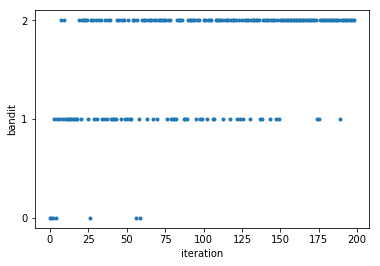

In [10]:
plt.plot(chosen,'.')
plt.yticks([0,1,2])
plt.xlabel('iteration')
plt.ylabel('bandit')

#### The posterior distribution (the beta distribution) can be monitored by looking at the posterior predictive, which is the most likely datapoint to be observed, given the observations so far. We can replot the data with this added, shown as a dashed line

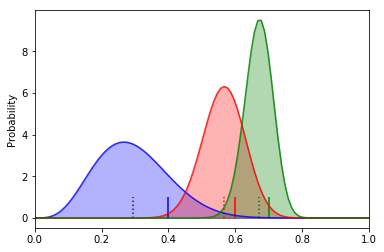

In [11]:
for bandit,col in zip(bandits,colors):
    bandit.plot_prior(color=col)
    bandit.plot_posterior(color=col)
    bandit.plot_posterior_predictive(color=col)
plt.show()